# train

In [15]:
import jax.numpy as np
from jax import grad, jit, vmap, random, lax, jacfwd
from jax import lax
from jax.ops import index_update, index
import matplotlib.pyplot as plt
import numpy as onp

import utils
import metrics
import time
import plot
from svgd import SVGD

rkey = random.PRNGKey(0)

In [20]:
dist = metrics.Gaussian(0, 1)
dist = metrics.GaussianMixture([-2, 2], [1, 1], [1/3, 2/3])

n_steps = 200
svgd = SVGD(dist, n_steps)

h = 1
meta_stepsize = 0.1
svgd_stepsize = 0.01
bandwidth = h

### train

In [21]:
x, log = svgd.train(rkey, h, meta_stepsize, svgd_stepsize, n_steps)

JIT COMPILING step...
...done compiling step after 0.45881009101867676 seconds.


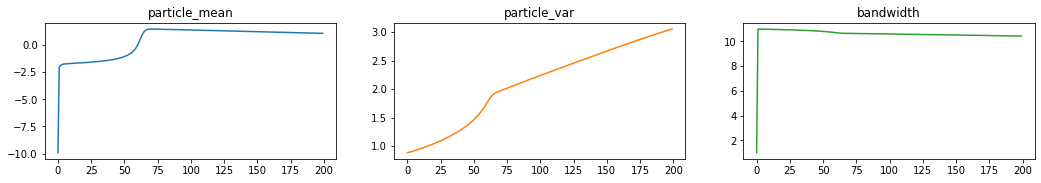

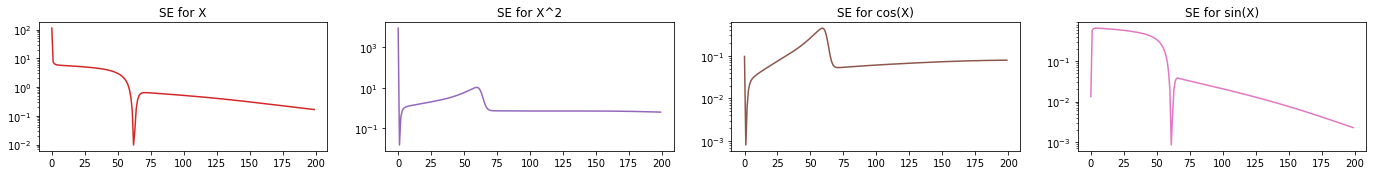

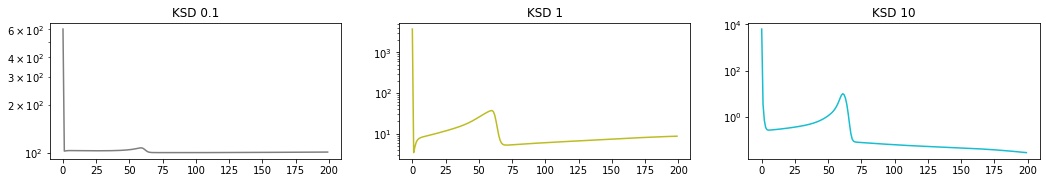

In [22]:
plot.svgd_log(log)

In [7]:
log["desc"]["bandwidth"][100:110]

DeviceArray([[10.988818],
             [10.988731],
             [10.988645],
             [10.988558],
             [10.988471],
             [10.988384],
             [10.988297],
             [10.988211],
             [10.988124],
             [10.988038]], dtype=float32)

In [13]:
log["metrics"]["square_errors"][-1:]

DeviceArray([[[7.8097361e-07],
              [4.2082956e-06],
              [1.6803850e-05],
              [6.0209411e-04]]], dtype=float32)